# In this file I'm going to work on my predictor for low and high volume comment articles.  I'll start with CountVect and feeding it into NB.
# Then I'll use LSA to get 10 vectors (see notebok 02 for why 10) and feed those vectors into different gridsearches of classifiers.  Ultimately in this notebook I'll create a graph of ROC curves to determine the best classifier

In [7]:
import pandas as pd
import numpy as np
import sklearn
import gensim
import nltk
import os
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.DataFrame.from_csv("CleanedApril2018.csv")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [4]:
X = df["keywords"]

In [6]:
y = df["Outcome"]

In [7]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(X)  # dtm: Document-Term Matrix
X_new = pd.DataFrame(dtm.toarray(), index=X, columns=vectorizer.get_feature_names())

In [10]:
X_new.columns

Index(['11', '12', '1689', '1723', '1733', '1790', '18', '1830', '1861',
       '1866',
       ...
       'zimbabwe', 'zinke', 'zoe', 'zoloft', 'zomba', 'zone', 'zoos', 'zpass',
       'zuckerberg', 'zuma'],
      dtype='object', length=4075)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [18]:
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
clf.score(X_train,y_train)

0.8832298136645963

In [32]:
clf.score(X_test,y_test)

0.7072463768115942

# As we can see, this process caused overfitting.  Now we'll move to creating LSA vectors to feed into the model.  I'll be using 10 vectors, see notebook 02 for my reasoning.

In [6]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(keywords)  # dtm: Document-Term Matrix
pd.DataFrame(dtm.toarray(), index=keywords, columns=vectorizer.get_feature_names()).head(10)

,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
keywords,,,,,,,,,,,,,,,,,,,,,
"['Workplace Hazards and Violations', 'Football', 'Cheerleaders', 'Discrimination', 'Sexual Harassment', 'National Football League', 'Davis, Bailey', 'Goodell, Roger']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Environmental Protection Agency', 'Pruitt, Scott', 'United States Politics and Government', 'Research']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Restaurants', 'Noma (Copenhagen, Restaurant)', 'Redzepi, Rene', 'Copenhagen (Denmark)']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Texas', 'Soil', 'Pregnancy and Childbirth', 'New York Times']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Bicycles and Bicycling', 'Google Maps', 'Commuting']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Hackett, Jim', 'Ford Motor Co', 'Automobiles', 'Sports Utility Vehicles and Light Trucks', 'Trucks and Trucking']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Romney, Mitt', 'Elections, Senate', 'Utah', 'Republican Party', 'Trump, Donald J']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Social Media', 'Conservatism (US Politics)', 'Bone, Kenneth (1982- )', 'Damore, James', 'Lipset, Seymour Martin']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"['Francis', 'Roman Catholic Church', 'Karadima, Fernando', 'Sex Crimes', 'Priests', 'Pell, George (1941- )', 'Chile']",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
lsa = TruncatedSVD(10, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [8]:
lsa.explained_variance_ratio_

array([0.07978307, 0.02916584, 0.02155648, 0.02152315, 0.0196936 ,
       0.01601496, 0.01429026, 0.01250633, 0.0118459 , 0.0120055 ])

In [9]:
pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"],columns = vectorizer.get_feature_names())


,11,12,1689,1723,1733,1790,18,1830,1861,1866,...,zimbabwe,zinke,zoe,zoloft,zomba,zone,zoos,zpass,zuckerberg,zuma
component_1,0.00048,0.00153,0.00002,0.00125,0.00002,0.00001,0.00011,0.00000,0.00004,0.00001,...,0.00002,0.00250,0.00004,0.00001,0.00002,0.00145,0.00000,0.00009,0.00530,0.00043
component_2,-0.00152,0.00498,0.00029,-0.00247,0.00029,-0.00000,-0.00076,-0.00000,0.00005,-0.00000,...,0.00010,0.00101,0.00016,-0.00001,0.00007,-0.00494,0.00000,0.00124,0.01082,0.00055
component_3,0.00010,0.01907,0.00015,-0.00045,0.00015,0.00001,-0.00004,0.00005,0.00020,0.00001,...,0.00010,0.00024,0.00004,0.00014,0.00017,-0.00073,0.00000,0.00655,-0.00256,0.00088
component_4,0.00030,-0.00321,0.00036,0.00160,0.00036,-0.00002,0.00052,0.00001,0.00001,-0.00002,...,-0.00007,-0.00223,0.00001,0.00003,-0.00009,0.00439,0.00001,-0.00001,0.01020,-0.00195
component_5,-0.00004,0.00883,0.00027,-0.00086,0.00027,0.00003,-0.00022,0.00001,0.00011,0.00003,...,0.00030,0.00211,-0.00002,0.00002,0.00009,-0.00187,0.00003,0.00196,0.03243,0.00172
component_6,0.00044,0.02976,0.00071,0.00048,0.00071,-0.00000,0.00097,0.00005,0.00029,-0.00000,...,0.00011,-0.00497,0.00014,0.00011,-0.00008,0.00534,0.00002,0.01452,-0.00513,-0.00128
component_7,0.00421,-0.00177,0.00013,-0.00328,0.00013,0.00002,0.00298,0.00004,0.00033,0.00002,...,-0.00006,-0.00018,0.00015,0.00019,0.00003,-0.00051,-0.00000,-0.00035,0.00412,-0.00044
component_8,0.00026,-0.01443,-0.00511,-0.00118,-0.00511,-0.00017,0.00075,-0.00009,-0.00061,-0.00017,...,-0.00081,-0.00813,-0.00010,-0.00006,0.00037,0.00691,0.00010,-0.00207,-0.01612,-0.00118
component_9,0.00001,-0.00078,0.00858,-0.00045,0.00858,0.00005,0.00104,0.00002,0.00044,0.00005,...,0.00037,-0.00308,0.00058,0.00012,0.00020,0.00286,0.00003,-0.00183,0.00375,-0.00030
component_10,0.00005,-0.02221,0.00506,-0.00030,0.00506,-0.00004,0.00036,0.00002,-0.00041,-0.00004,...,-0.00089,-0.00362,0.00003,-0.00027,0.00046,0.00077,-0.00003,-0.00687,-0.01411,-0.00064


In [10]:
s = pd.DataFrame(dtm_lsa.round(5), index = keywords, columns = ["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"])

In [13]:
X = s[["component_1","component_2","component_3","component_4","component_5","component_6","component_7","component_8","component_9","component_10"]]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# The rest of the notebook will be devoted to trying different classifiers on these 10 vectors, and ultimately producing the ROC curve shown below

Text(0.5,1,'ROCs for Each Model')

<Figure size 432x288 with 0 Axes>

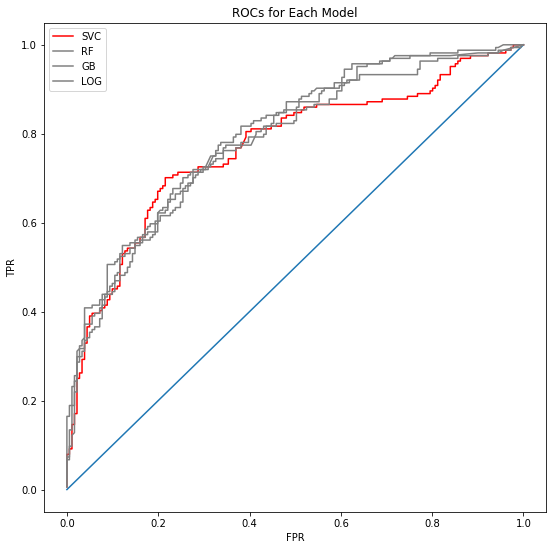

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fpr_svc, tpr_svc,_ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_rf, tpr_rf,_ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb,_ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_log, tpr_log,_ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)


plt.figure()
plt.figure(figsize=(9,9))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
line1 = plt.plot(fpr_svc,tpr_svc, label = 'SVC', color = 'red')
line2 = plt.plot(fpr_rf,tpr_rf, label = 'RF', color = 'grey')
line3 = plt.plot(fpr_gb,tpr_gb, label = 'GB', color = 'grey')
line4 = plt.plot(fpr_log,tpr_log, label = 'LOG', color = 'grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROCs for Each Model')

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [17]:
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [18]:
clf.score(X_train, y_train)

0.7055900621118012

In [19]:
clf.score(X_test, y_test)

0.7130434782608696

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, clf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.70      0.78      0.74       181
          1       0.73      0.63      0.68       164

avg / total       0.71      0.71      0.71       345



# Gradient Boosting

In [22]:
gradboost = GradientBoostingClassifier()

In [23]:
n_range = [10, 100, 300]
l_rate = [.001, .01, .1]
depth = [3, 5]
param_grid = dict(n_estimators=n_range, learning_rate=l_rate, max_depth=depth, random_state=[2])

In [24]:
grid_gb = GridSearchCV(gradboost, param_grid, cv=10, scoring='accuracy', pre_dispatch=-1)

In [25]:
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 300], 'learning_rate': [0.001, 0.01, 0.1], 'max_depth': [3, 5], 'random_state': [2]},
       pre_dispatch=-1, refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [26]:
grid_gb.grid_scores_


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.53540, std: 0.00299, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'random_state': 2},
 mean: 0.63106, std: 0.04714, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'random_state': 2},
 mean: 0.69317, std: 0.02778, params: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 300, 'random_state': 2},
 mean: 0.53540, std: 0.00299, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10, 'random_state': 2},
 mean: 0.65217, std: 0.04282, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100, 'random_state': 2},
 mean: 0.68696, std: 0.04514, params: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 300, 'random_state': 2},
 mean: 0.63106, std: 0.04714, params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10, 'random_state': 2},
 mean: 0.69938, std: 0.03733, params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'random_state': 2},
 mean: 0.71801, std: 0.03258, params: {'learn

In [27]:
print(grid_gb.best_score_)
print(grid_gb.best_params_)
print(grid_gb.best_estimator_)

0.7180124223602484
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'random_state': 2}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)


In [28]:
print(classification_report(y_test, grid_gb.predict(X_test)))

             precision    recall  f1-score   support

          0       0.71      0.78      0.74       181
          1       0.73      0.65      0.69       164

avg / total       0.72      0.72      0.72       345



In [29]:
y_score_gb = grid_gb.predict_proba(X_test)[:,1]

# Random Forest

In [31]:
randomforest = RandomForestClassifier()

In [61]:
n_range = [10, 50, 100, 300, 500]
feat_range = [2, 5, ]
depth = [2, 5, 10]
param_grid = dict(n_estimators=n_range, max_features=feat_range, max_depth=depth)

In [62]:
grid_rf = GridSearchCV(randomforest, param_grid, cv=10, scoring='accuracy', pre_dispatch=-1)

In [63]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 300, 500], 'max_features': [2, 5], 'max_depth': [2, 5, 10]},
       pre_dispatch=-1, refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
grid_rf.score(X_test, y_test)

0.7072463768115942

In [65]:
grid_rf.grid_scores_


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.71429, std: 0.04593, params: {'max_depth': 2, 'max_features': 2, 'n_estimators': 10},
 mean: 0.71429, std: 0.04647, params: {'max_depth': 2, 'max_features': 2, 'n_estimators': 50},
 mean: 0.72050, std: 0.04781, params: {'max_depth': 2, 'max_features': 2, 'n_estimators': 100},
 mean: 0.72547, std: 0.04943, params: {'max_depth': 2, 'max_features': 2, 'n_estimators': 300},
 mean: 0.72174, std: 0.04478, params: {'max_depth': 2, 'max_features': 2, 'n_estimators': 500},
 mean: 0.70807, std: 0.04746, params: {'max_depth': 2, 'max_features': 5, 'n_estimators': 10},
 mean: 0.70932, std: 0.04691, params: {'max_depth': 2, 'max_features': 5, 'n_estimators': 50},
 mean: 0.70932, std: 0.05043, params: {'max_depth': 2, 'max_features': 5, 'n_estimators': 100},
 mean: 0.71180, std: 0.04850, params: {'max_depth': 2, 'max_features': 5, 'n_estimators': 300},
 mean: 0.70932, std: 0.05113, params: {'max_depth': 2, 'max_features': 5, 'n_estimators': 500},
 mean: 0.71056, std: 0.04882, params: {'max_

In [66]:
print(classification_report(y_test, grid_rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.71      0.75      0.73       181
          1       0.70      0.66      0.68       164

avg / total       0.71      0.71      0.71       345



In [67]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.7316770186335404
{'max_depth': 10, 'max_features': 2, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [68]:
grid_rf.score(X_test, y_test)

0.7072463768115942

In [69]:
y_score_rf = grid_rf.predict_proba(X_test)[:,1]

# Logistic Regression

In [41]:
log = LogisticRegression()
c_range = [.01,.1,1,2,5]
param_grid = dict(C=c_range)


In [42]:
grid_log = GridSearchCV(log, param_grid, cv=10, scoring='roc_auc', pre_dispatch=-1)

In [43]:
grid_log.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 2, 5]}, pre_dispatch=-1, refit=True,
       return_train_score='warn', scoring='roc_auc', verbose=0)

In [44]:
grid_log.grid_scores_


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.76736, std: 0.04027, params: {'C': 0.01},
 mean: 0.77870, std: 0.04488, params: {'C': 0.1},
 mean: 0.78281, std: 0.04423, params: {'C': 1},
 mean: 0.78256, std: 0.04389, params: {'C': 2},
 mean: 0.78331, std: 0.04496, params: {'C': 5}]

In [45]:
print(grid_log.best_score_)
print(grid_log.best_params_)
print(grid_log.best_estimator_)

0.7833052569788242
{'C': 5}
LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [46]:
print(classification_report(y_test, grid_log.predict(X_test)))

             precision    recall  f1-score   support

          0       0.70      0.79      0.74       181
          1       0.73      0.62      0.67       164

avg / total       0.71      0.71      0.71       345



In [47]:
grid_log.score(X_test, y_test)

0.7799824821452636

In [59]:
y_score_log = grid_log.predict_proba(X_test)[:,1]

# SVM

In [50]:
c_range = [.01,.1,1,2]
kernel_types = ['linear','rbf']
gamma_range = [.001,.01,.1]
param_grid = dict(C=c_range, kernel=kernel_types, gamma=gamma_range, probability=[True])

grid_svc = GridSearchCV(SVC(), param_grid, cv=10, scoring='roc_auc', pre_dispatch=-1)

In [51]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 2], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1], 'probability': [True]},
       pre_dispatch=-1, refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [52]:
print(classification_report(y_test, grid_svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.71      0.81      0.76       181
          1       0.76      0.64      0.69       164

avg / total       0.73      0.73      0.73       345



In [53]:
print(grid_svc.best_score_)
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

0.7771571751030003
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [54]:
grid_svc.score(X_test, y_test)

0.7693033283923999

In [55]:
y_score_svc = grid_svc.predict_proba(X_test)[:,1]

In [88]:
class_names = [0,1]
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.73      0.80      0.76       181
          1       0.75      0.67      0.71       164

avg / total       0.74      0.74      0.73       345

Confusion matrix, without normalization
[[144  37]
 [ 54 110]]


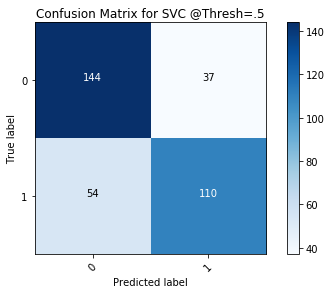

In [98]:
# For people we're sure are in the 0 group
threshold = .5
y_pred_svc = [1 if x >= threshold else 0 for x in y_score_svc]
print(classification_report(y_test, y_pred_svc))
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix for SVC @Thresh=.5')

Text(0.5,1,'ROCs for Each Model')

<Figure size 432x288 with 0 Axes>

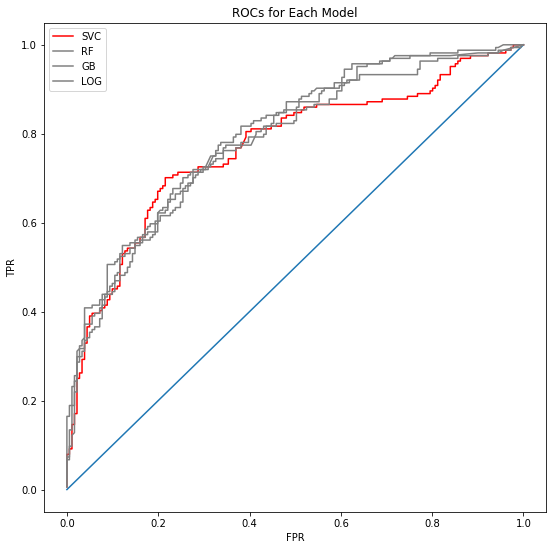

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fpr_svc, tpr_svc,_ = roc_curve(y_test, y_score_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

fpr_rf, tpr_rf,_ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb,_ = roc_curve(y_test, y_score_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_log, tpr_log,_ = roc_curve(y_test, y_score_log)
roc_auc_log = auc(fpr_log, tpr_log)


plt.figure()
plt.figure(figsize=(9,9))
# Plotting our Baseline..
plt.plot([0,1],[0,1])
line1 = plt.plot(fpr_svc,tpr_svc, label = 'SVC', color = 'red')
line2 = plt.plot(fpr_rf,tpr_rf, label = 'RF', color = 'grey')
line3 = plt.plot(fpr_gb,tpr_gb, label = 'GB', color = 'grey')
line4 = plt.plot(fpr_log,tpr_log, label = 'LOG', color = 'grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROCs for Each Model')